## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #will display the max no of columns in the dataset

In [2]:
flights = pd.read_csv('flights.csv') #reading the csv file
flights

C:\Users\Zainab\AppData\Local\Temp\ipykernel_5204\3624454723.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv') #reading the csv file


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [4]:
# predict the cause of arrival delay
#selecting only those columns which are important
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED', 'CANCELLATION_REASON']]

In [5]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,NaN,NaN,NaN,NaN,NaN,0,NaN


In [6]:
flights.isna().sum() #finding columns with null values

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
CANCELLED                    0
CANCELLATION_REASON    5729195
dtype: int64

In [7]:
flights[flights['ARRIVAL_DELAY'].isna()] #checking null values of arrival delay column


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818160,2015,12,31,4,WN,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5818318,2015,12,31,4,AA,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818777,2015,12,31,4,NK,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A


In [8]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values.shape #checking the null values of the above columns

(4755640, 20)

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>],
       [<Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>]], dtype=object)

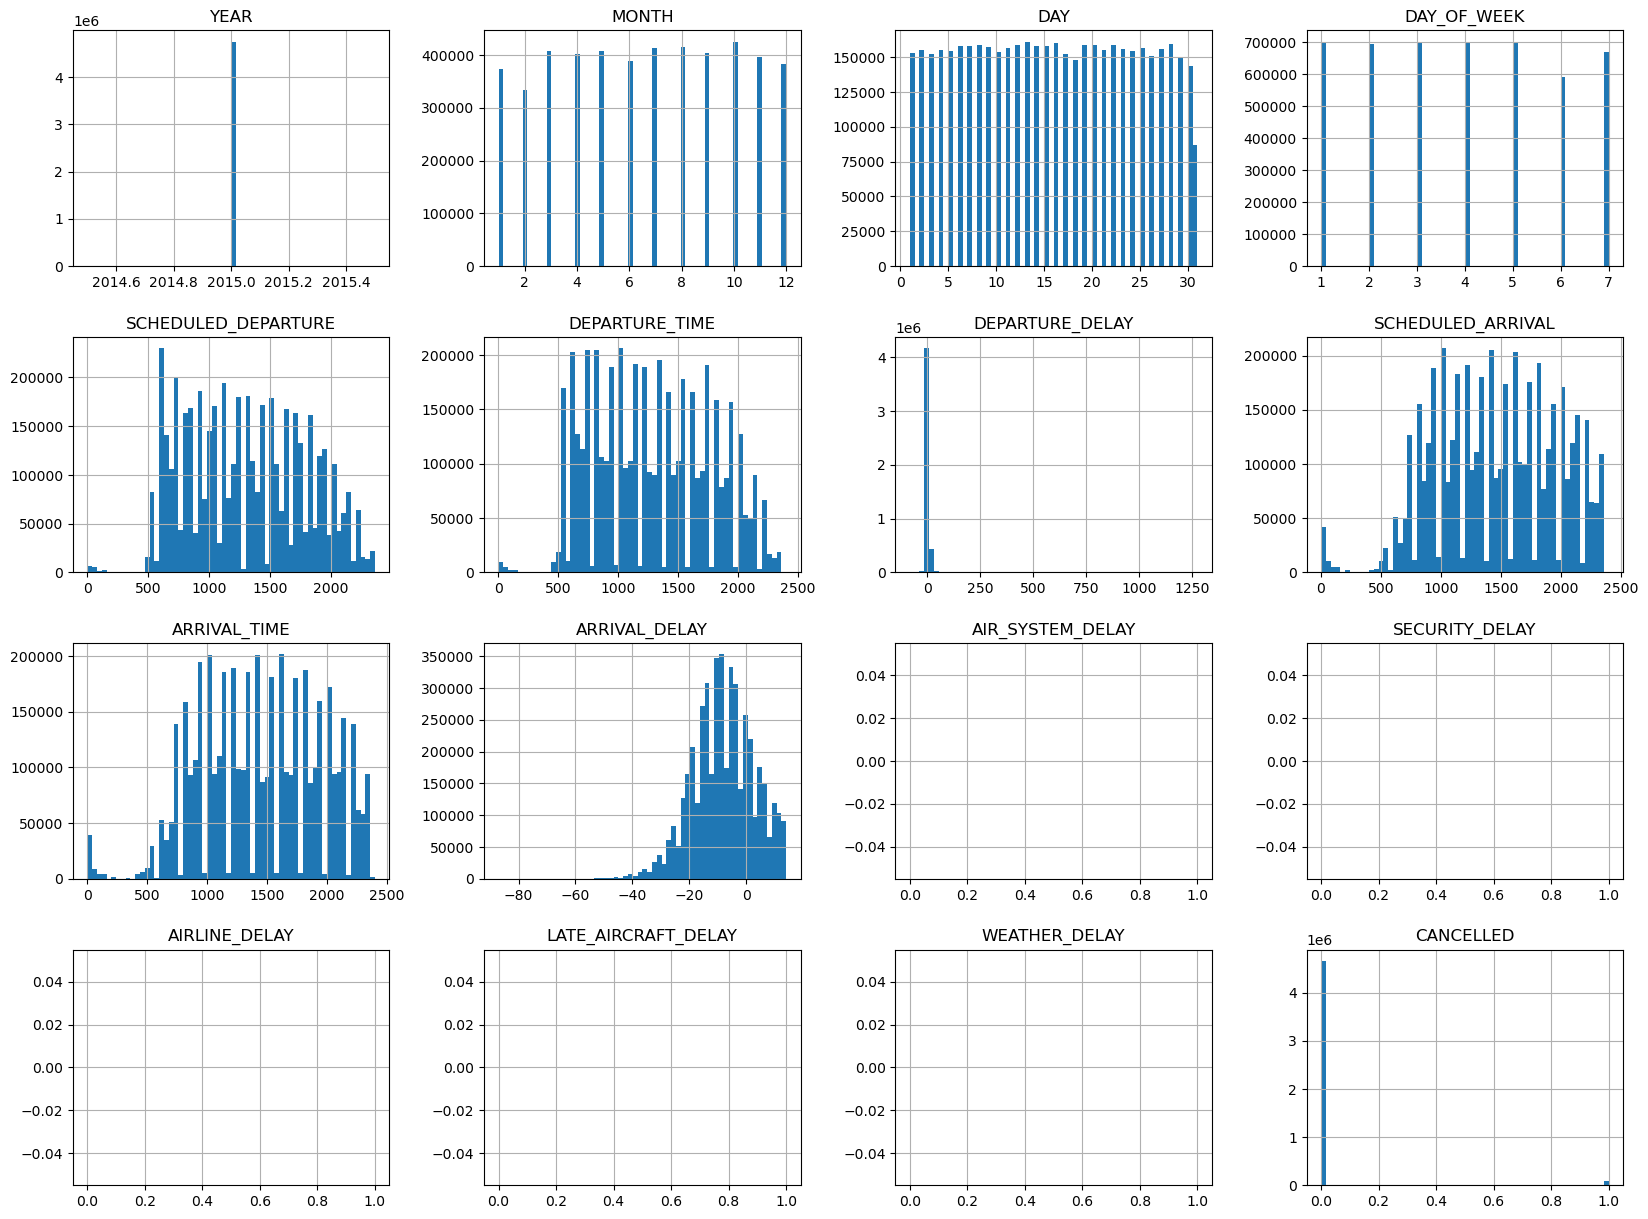

In [9]:
na_values.hist(bins=60, figsize=(20,15)) #displaying the info in a histogram for better understanding

In [10]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()] #storing null values of arrival day in a diff variable
arrival_na 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818160,2015,12,31,4,WN,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5818318,2015,12,31,4,AA,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818777,2015,12,31,4,NK,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A


In [11]:
arrival_na['CANCELLED'].value_counts() #checking if the arrival delay is null due to being the flight being cancelled or not

CANCELLED
1    89884
0    15187
Name: count, dtype: int64

In [12]:
flights = flights[~flights['AIR_SYSTEM_DELAY'].isna()] #storing only the values of arrival delay where values are not null
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
27,2015,1,1,4,NK,MSP,FLL,115,127.0,12.0,542,607.0,25.0,25.0,0.0,0.0,0.0,0.0,0,NaN
30,2015,1,1,4,NK,PHX,ORD,125,237.0,72.0,549,632.0,43.0,43.0,0.0,0.0,0.0,0.0,0,NaN
35,2015,1,1,4,HA,LAS,HNL,145,145.0,0.0,555,610.0,15.0,0.0,0.0,15.0,0.0,0.0,0,NaN
50,2015,1,1,4,B6,BQN,MCO,307,304.0,-3.0,500,520.0,20.0,20.0,0.0,0.0,0.0,0.0,0,NaN
52,2015,1,1,4,B6,SJU,MCO,400,535.0,95.0,605,730.0,85.0,0.0,0.0,85.0,0.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,MCO,BQN,2342,3.0,21.0,325,345.0,20.0,0.0,0.0,17.0,3.0,0.0,0,NaN
5819051,2015,12,31,4,AS,SEA,MSP,2355,11.0,16.0,507,535.0,28.0,12.0,0.0,16.0,0.0,0.0,0,NaN
5819057,2015,12,31,4,NK,FLL,BQN,2358,11.0,13.0,318,346.0,28.0,15.0,0.0,13.0,0.0,0.0,0,NaN
5819069,2015,12,31,4,B6,LAS,JFK,2359,238.0,159.0,741,1020.0,159.0,0.0,0.0,159.0,0.0,0.0,0,NaN


In [13]:
flights.isna().sum() #since all the null values of arrival delay are gone therefore all the null values from other columns are also removed

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
CANCELLED                    0
CANCELLATION_REASON    1063439
dtype: int64

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>],
       [<Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>]], dtype=object)

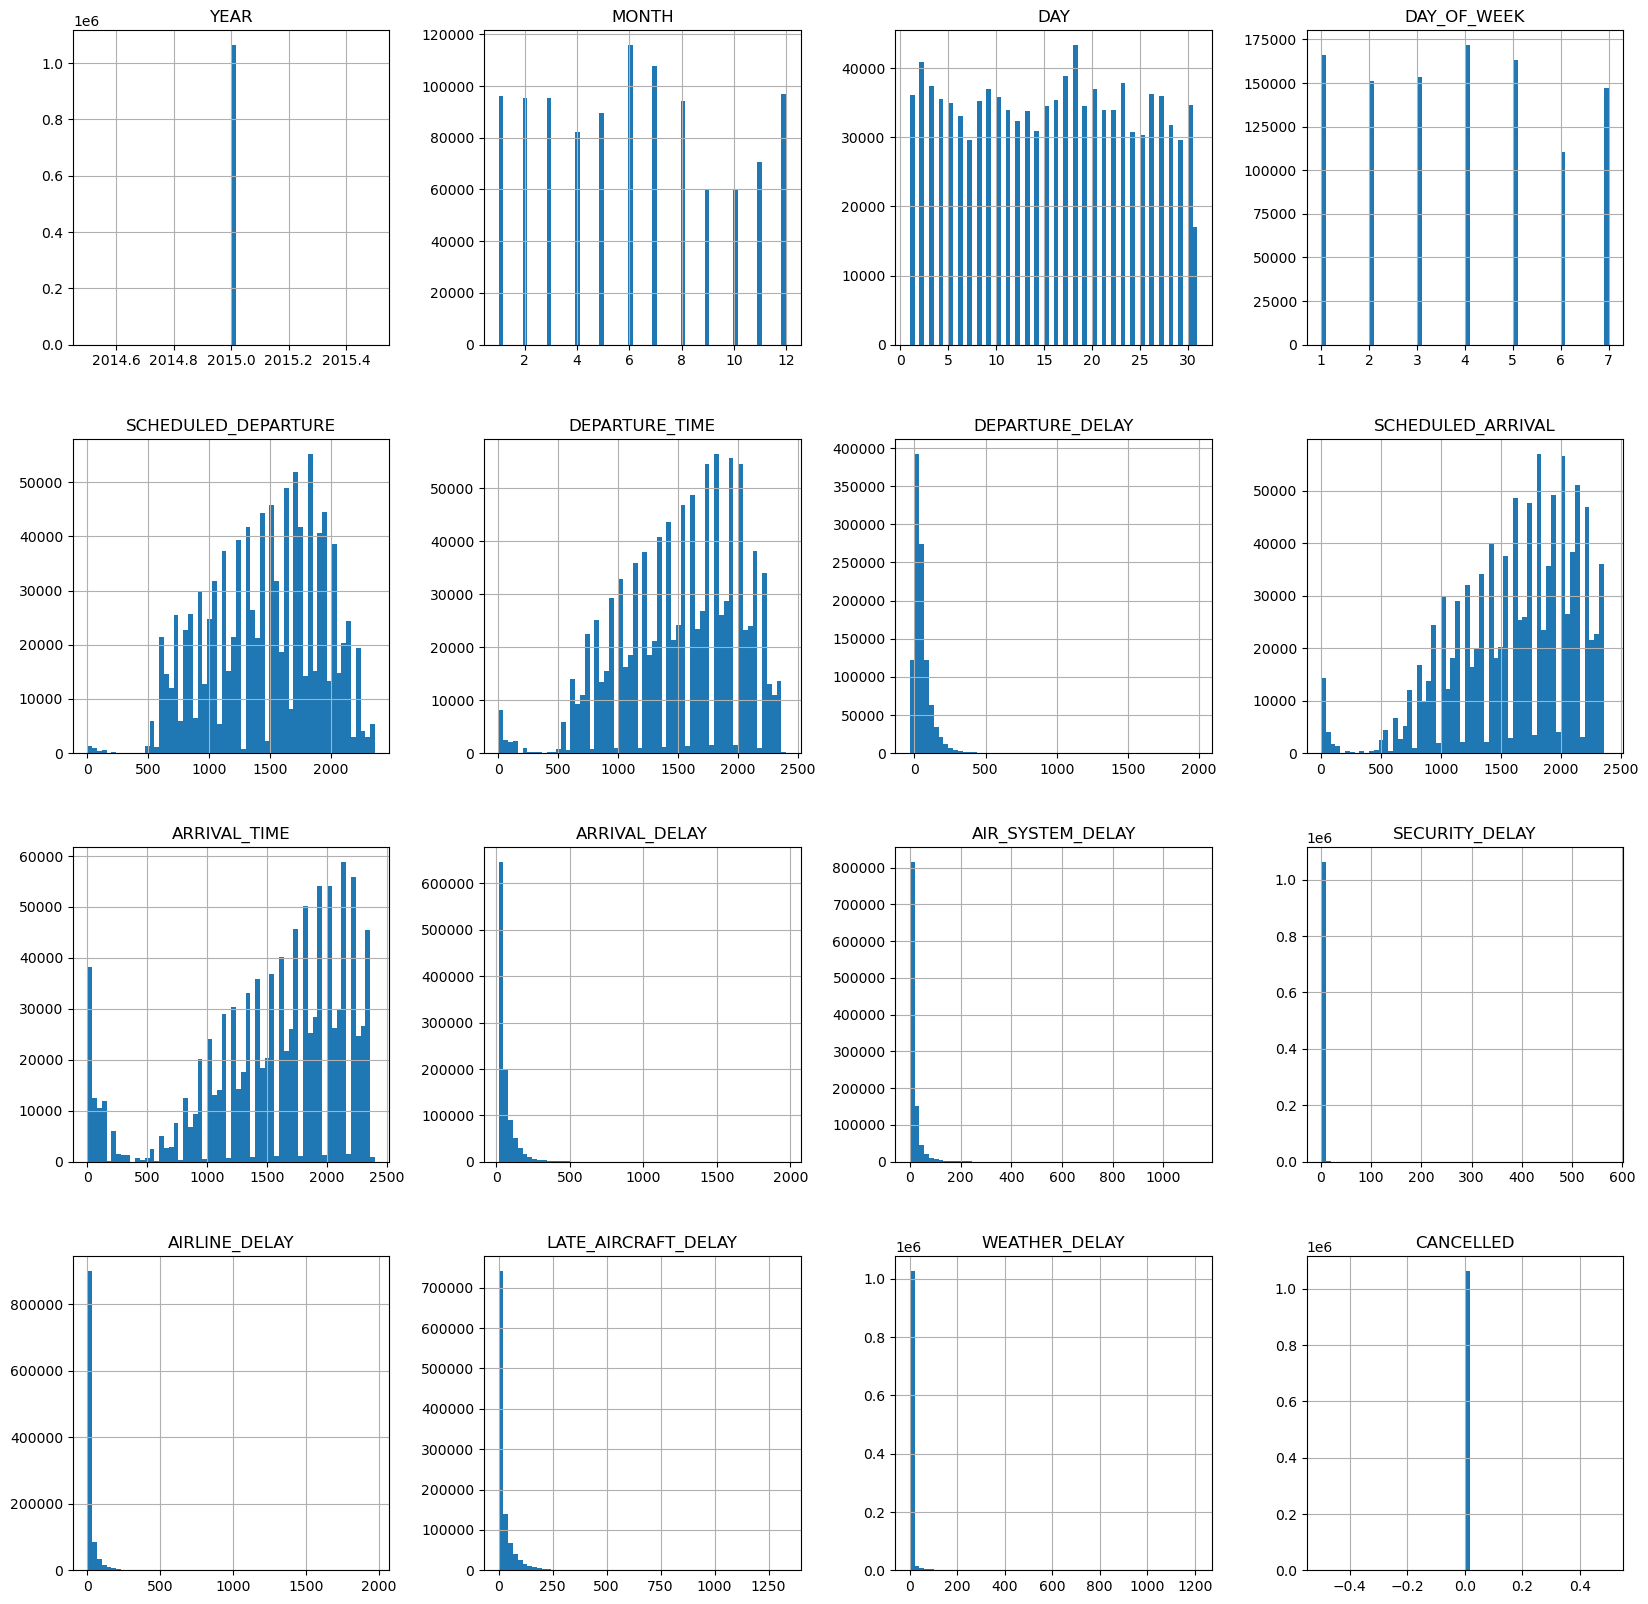

In [14]:
flights.hist(bins=60, figsize=(20,20))

In [15]:
flights[flights['ARRIVAL_DELAY']>1500] #checking if arrival delay exceeds 1500 mins 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
264495,2015,1,18,7,AA,LAS,LAX,1130,1414.0,1604.0,1246,1519.0,1593.0,0.0,0.0,1593.0,0.0,0.0,0,NaN
337720,2015,1,23,5,AA,BHM,DFW,700,1608.0,1988.0,914,1805.0,1971.0,0.0,0.0,1971.0,0.0,0.0,0,NaN
396544,2015,1,27,2,AA,FAT,DFW,659,850.0,1551.0,1210,1356.0,1546.0,0.0,0.0,1546.0,0.0,0.0,0,NaN
886984,2015,2,28,6,AA,STL,MIA,620,847.0,1587.0,1008,1315.0,1627.0,40.0,0.0,1587.0,0.0,0.0,0,NaN
949876,2015,3,4,3,AA,HNL,LAX,828,1057.0,1589.0,1555,1811.0,1576.0,0.0,0.0,1576.0,0.0,0.0,0,NaN
1047179,2015,3,10,2,AA,SAT,DFW,850,1047.0,1557.0,1000,1154.0,1554.0,0.0,0.0,1554.0,0.0,0.0,0,NaN
1278418,2015,3,24,2,AA,OMA,DFW,1103,1352.0,1609.0,1255,1533.0,1598.0,0.0,0.0,1563.0,35.0,0.0,0,NaN
1290061,2015,3,25,3,AA,SMF,DFW,625,748.0,1523.0,1149,1303.0,1514.0,0.0,0.0,1514.0,0.0,0.0,0,NaN
1841449,2015,4,28,2,AA,SAN,JFK,745,927.0,1542.0,1615,1809.0,1554.0,12.0,0.0,838.0,704.0,0.0,0,NaN
2739880,2015,6,22,1,AA,RIC,DFW,715,837.0,1522.0,920,1028.0,1508.0,0.0,0.0,1508.0,0.0,0.0,0,NaN


In [16]:
flights.dtypes #checking dtypes to ensure each column has its appropraite dtype

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON     object
dtype: object

In [17]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'SCHEDULED_DEPARTURE','AIRLINE_DELAY',
       'SCHEDULED_ARRIVAL','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
#storing only valuable columns now

In [18]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
SCHEDULED_DEPARTURE      int64
AIRLINE_DELAY          float64
SCHEDULED_ARRIVAL        int64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [19]:
#setting target features
flights['all_delay']= flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)
flights

C:\Users\Zainab\AppData\Local\Temp\ipykernel_5204\1307341245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['all_delay']= flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,AIRLINE_DELAY,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay
27,2015,1,1,4,NK,115,0.0,542,25.0,0.0,0.0,0.0,0.0,25.0
30,2015,1,1,4,NK,125,0.0,549,43.0,0.0,0.0,0.0,0.0,43.0
35,2015,1,1,4,HA,145,15.0,555,0.0,0.0,15.0,0.0,0.0,30.0
50,2015,1,1,4,B6,307,0.0,500,20.0,0.0,0.0,0.0,0.0,20.0
52,2015,1,1,4,B6,400,85.0,605,0.0,0.0,85.0,0.0,0.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,2342,17.0,325,0.0,0.0,17.0,3.0,0.0,37.0
5819051,2015,12,31,4,AS,2355,16.0,507,12.0,0.0,16.0,0.0,0.0,44.0
5819057,2015,12,31,4,NK,2358,13.0,318,15.0,0.0,13.0,0.0,0.0,41.0
5819069,2015,12,31,4,B6,2359,159.0,741,0.0,0.0,159.0,0.0,0.0,318.0


In [20]:
#stroing the core delay reason (if there are more than 1 reasons for flight delay) in a diff column(delay-reason)
flights['delay_reason'] = np.where( 
    flights['all_delay'] > 0,
    flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1),
    'NO_DELAY'
)
flights

C:\Users\Zainab\AppData\Local\Temp\ipykernel_5204\533179639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['delay_reason'] = np.where(


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,AIRLINE_DELAY,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay,delay_reason
27,2015,1,1,4,NK,115,0.0,542,25.0,0.0,0.0,0.0,0.0,25.0,AIR_SYSTEM_DELAY
30,2015,1,1,4,NK,125,0.0,549,43.0,0.0,0.0,0.0,0.0,43.0,AIR_SYSTEM_DELAY
35,2015,1,1,4,HA,145,15.0,555,0.0,0.0,15.0,0.0,0.0,30.0,AIRLINE_DELAY
50,2015,1,1,4,B6,307,0.0,500,20.0,0.0,0.0,0.0,0.0,20.0,AIR_SYSTEM_DELAY
52,2015,1,1,4,B6,400,85.0,605,0.0,0.0,85.0,0.0,0.0,170.0,AIRLINE_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,2342,17.0,325,0.0,0.0,17.0,3.0,0.0,37.0,AIRLINE_DELAY
5819051,2015,12,31,4,AS,2355,16.0,507,12.0,0.0,16.0,0.0,0.0,44.0,AIRLINE_DELAY
5819057,2015,12,31,4,NK,2358,13.0,318,15.0,0.0,13.0,0.0,0.0,41.0,AIR_SYSTEM_DELAY
5819069,2015,12,31,4,B6,2359,159.0,741,0.0,0.0,159.0,0.0,0.0,318.0,AIRLINE_DELAY


In [21]:
flights['delay_reason'].value_counts()

delay_reason
LATE_AIRCRAFT_DELAY    410647
AIRLINE_DELAY          311386
AIR_SYSTEM_DELAY       303784
WEATHER_DELAY           35711
SECURITY_DELAY           1911
Name: count, dtype: int64

In [22]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'AIRLINE_DELAY', 'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'all_delay', 'delay_reason'],
      dtype='object')

In [23]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'delay_reason']]
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,delay_reason
27,2015,1,1,4,NK,115,AIR_SYSTEM_DELAY
30,2015,1,1,4,NK,125,AIR_SYSTEM_DELAY
35,2015,1,1,4,HA,145,AIRLINE_DELAY
50,2015,1,1,4,B6,307,AIR_SYSTEM_DELAY
52,2015,1,1,4,B6,400,AIRLINE_DELAY
...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,2342,AIRLINE_DELAY
5819051,2015,12,31,4,AS,2355,AIRLINE_DELAY
5819057,2015,12,31,4,NK,2358,AIR_SYSTEM_DELAY
5819069,2015,12,31,4,B6,2359,AIRLINE_DELAY


### Spliting the Data

In [24]:
x_flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE']]
x_flights = pd.get_dummies(x_flights, dtype=np.uint8)
y_flights = flights[['delay_reason']]

In [25]:
x_flights
# y_flights


,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
27,2015,1,1,4,115,0,0,0,0,0,0,0,0,1,0,0,0,0,0
30,2015,1,1,4,125,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35,2015,1,1,4,145,0,0,0,0,0,0,1,0,0,0,0,0,0,0
50,2015,1,1,4,307,0,0,1,0,0,0,0,0,0,0,0,0,0,0
52,2015,1,1,4,400,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,2342,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5819051,2015,12,31,4,2355,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5819057,2015,12,31,4,2358,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5819069,2015,12,31,4,2359,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Training a ML Model

In [26]:
# %pip install scikit-learn
# from sklearn.datasets import load_iris
# data = load_iris()

# from sklearn.datasets import fetch_20newsgroups
# newsgroup_train = fetch_20newsgroups()

### Splitting into train and test datasets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_flights, y_flights, test_size=0.30, random_state=15)
y_test

,delay_reason
740903,AIRLINE_DELAY
4648712,AIRLINE_DELAY
1020752,LATE_AIRCRAFT_DELAY
3000291,LATE_AIRCRAFT_DELAY
4266980,AIRLINE_DELAY
...,...
1305173,LATE_AIRCRAFT_DELAY
2973395,LATE_AIRCRAFT_DELAY
5726228,AIRLINE_DELAY
2524184,LATE_AIRCRAFT_DELAY


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_flights, y_flights, test_size=0.15, random_state=15)
X_train, X_validation,y_train,y_validation = train_test_split(X_train,y_train, test_size=0.20, random_state=15)

#### Dealing with unbalanced data

In [29]:
!pip install imbalanced-learn

In [30]:
y_train.value_counts()

delay_reason       
LATE_AIRCRAFT_DELAY    279576
AIRLINE_DELAY          211295
AIR_SYSTEM_DELAY       206652
WEATHER_DELAY           24295
SECURITY_DELAY           1320
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [32]:
y_resampled.value_counts()

delay_reason       
AIRLINE_DELAY          279576
AIR_SYSTEM_DELAY       279576
LATE_AIRCRAFT_DELAY    279576
SECURITY_DELAY         279576
WEATHER_DELAY          279576
Name: count, dtype: int64

## Training

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [46]:
y_pred = clf.predict(X_test)
y_pred

array(['LATE_AIRCRAFT_DELAY', 'LATE_AIRCRAFT_DELAY',
       'LATE_AIRCRAFT_DELAY', ..., 'LATE_AIRCRAFT_DELAY',
       'LATE_AIRCRAFT_DELAY', 'LATE_AIRCRAFT_DELAY'], dtype=object)

In [47]:
clf.score(X_test,y_test) # calculates the accuracy of your Decision Tree Classifier (clf) on the test data
#Accuracy= Total Predictions / Number of Correct Predictions

0.43571804709245465

### Evaluation

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred, labels=clf.classes_)

In [48]:
cm

array([[18190, 12302, 15314,    65,   980],
       [14221, 17600, 12630,    75,  1067],
       [18765, 13655, 27925,    73,  1136],
       [   93,    96,    74,    14,     8],
       [ 1511,  1488,  1628,     9,   597]], dtype=int64)

<Axes: >

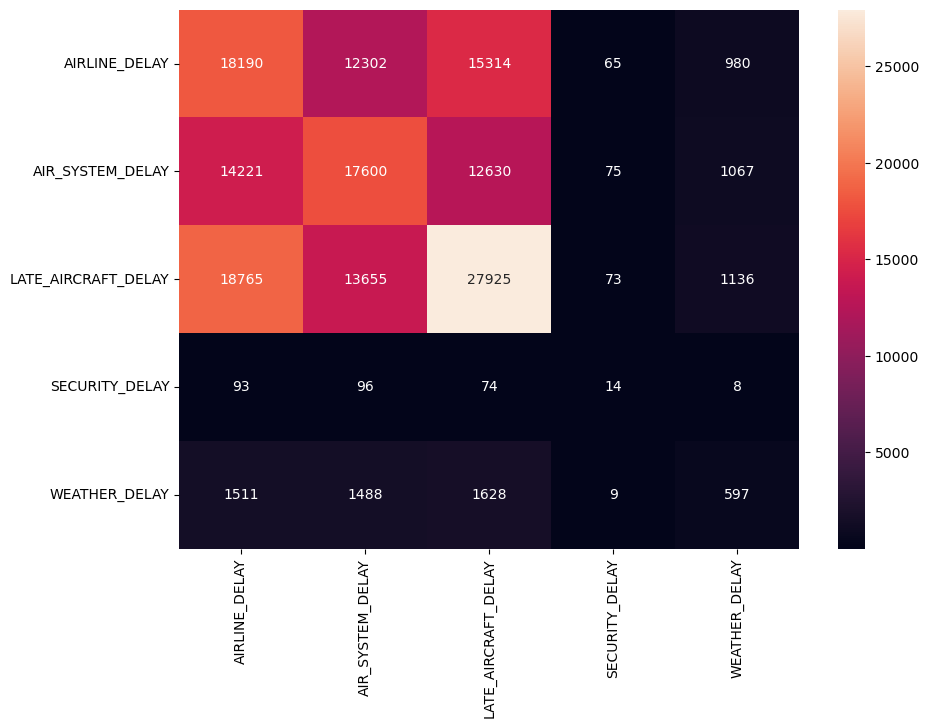

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.34      0.39      0.37     46851
   AIR_SYSTEM_DELAY       0.39      0.39      0.39     45593
LATE_AIRCRAFT_DELAY       0.49      0.45      0.47     61554
     SECURITY_DELAY       0.06      0.05      0.05       285
      WEATHER_DELAY       0.16      0.11      0.13      5233

           accuracy                           0.40    159516
          macro avg       0.29      0.28      0.28    159516
       weighted avg       0.41      0.40      0.40    159516



In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.43571804709245465


### Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'max_depth':[10,15], 'max_features':["sqrt", "log2"]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15],
                         'max_features': ['sqrt', 'log2']})

In [41]:
y_pred = clf.predict(X_test)
y_pred

array(['LATE_AIRCRAFT_DELAY', 'LATE_AIRCRAFT_DELAY',
       'LATE_AIRCRAFT_DELAY', ..., 'LATE_AIRCRAFT_DELAY',
       'LATE_AIRCRAFT_DELAY', 'LATE_AIRCRAFT_DELAY'], dtype=object)

In [42]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.44      0.20      0.28     46851
   AIR_SYSTEM_DELAY       0.45      0.32      0.38     45593
LATE_AIRCRAFT_DELAY       0.47      0.80      0.59     61554
     SECURITY_DELAY       1.00      0.00      0.01       285
      WEATHER_DELAY       0.33      0.03      0.05      5233

           accuracy                           0.46    159516
          macro avg       0.54      0.27      0.26    159516
       weighted avg       0.45      0.46      0.42    159516



### Or just use cross validation

In [43]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
# cross_val_score(clf, x_flights, y_flights, cv=10)

c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

KeyboardInterrupt: 

In [ ]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)
cross_val_score(clf, x_flights, y_flights, cv=10)